<a href="https://colab.research.google.com/github/adhishrees/AIMLMonth2023/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TIME SERIES ANALYSIS OF CHANGING LIFESTYLE

##Uploading the dataset named "Lifestyle_and_Wellbeing_Data"

In [ ]:
#importing all the libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#downloading the dataset from Kaggle

import os
os.environ['KAGGLE_USERNAME'] = 'nityasinghal'
os.environ['KAGGLE_KEY'] = '409ddd347c802b06f3882b4c5fd9b073'
! kaggle datasets download -d nityasinghal/lifestyle-dataset

  0% 0.00/39.3k [00:00<?, ?B/s]
100% 39.3k/39.3k [00:00<00:00, 25.7MB/s]


In [ ]:
!unzip lifestyle-dataset.zip


Archive:  lifestyle-dataset.zip
  inflating: Wellbeing_and_lifestyle_data_Kaggle - Wellbeing_and_lifestyle_data_Kaggle.csv.csv  


In [ ]:
data = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle - Wellbeing_and_lifestyle_data_Kaggle.csv.csv')
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/8/2015,3,2,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,Female,722.3
2,7/9/2015,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,676.2
3,7/10/2015,4,4,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,Female,634.4
4,7/12/2015,1,4,3,8,0,2,1,0,1,...,7,7,1,2,4,1,7,21 to 35,Male,618.6


### Data Cleaning

In [ ]:
#Data cleaning is done to handle missing values and fill them with the mean values to enhance the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1899 non-null   object 
 1   FRUITS_VEGGIES           1899 non-null   int64  
 2   DAILY_STRESS             1899 non-null   int64  
 3   PLACES_VISITED           1899 non-null   int64  
 4   CORE_CIRCLE              1899 non-null   int64  
 5   SUPPORTING_OTHERS        1899 non-null   int64  
 6   SOCIAL_NETWORK           1899 non-null   int64  
 7   ACHIEVEMENT              1899 non-null   int64  
 8   DONATION                 1899 non-null   int64  
 9   BMI_RANGE                1899 non-null   int64  
 10  TODO_COMPLETED           1899 non-null   int64  
 11  FLOW                     1899 non-null   int64  
 12  DAILY_STEPS              1899 non-null   int64  
 13  LIVE_VISION              1899 non-null   int64  
 14  SLEEP_HOURS             

Since there are no null values, we need not replace the values and clean the data.

##Feature Engineering

Since there are 4 attributes with "object" datatype, we need to encode them.

We will encode gender as 0 for Male and 1 for Female.

For Age, we will categorize it into 3 major group: 21 to 35 yrs old as 0, 36 to 50 yrs old as 1, others as 2.

For


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
data['GENDER'] = np.where(data['GENDER']=='Male', 1, 0)

In [ ]:
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,0,609.5
1,2015-07-08,3,2,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,0,722.3
2,2015-07-09,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,0,676.2
3,2015-07-10,4,4,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,0,634.4
4,2015-07-12,1,4,3,8,0,2,1,0,1,...,7,7,1,2,4,1,7,21 to 35,1,618.6


To Encode the categories given in the column "Age", we need to create another column named "*AGE_encoded*" where we will encode

**{"21 to 35" : 0, "36 to 50" : 1, "51 or more" : 2,  "Less than 20" : 3}**

In [ ]:
data['AGE'].isnull().unique()

array([False])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the data
le.fit(data['AGE'])

# Transform the data
data['AGE_encoded'] = le.transform(data['AGE'])

data = data.drop(columns = "AGE")

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
import datetime

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['DATE'] = data['Timestamp'].dt.date

In [ ]:
data = data.drop(columns = 'Timestamp')

In [ ]:
data.info()

In [ ]:
X= data['DATE'] #time axis
Y= data.drop(columns = 'DATE') #y-axis

In [ ]:
data = data.set_index('DATE')

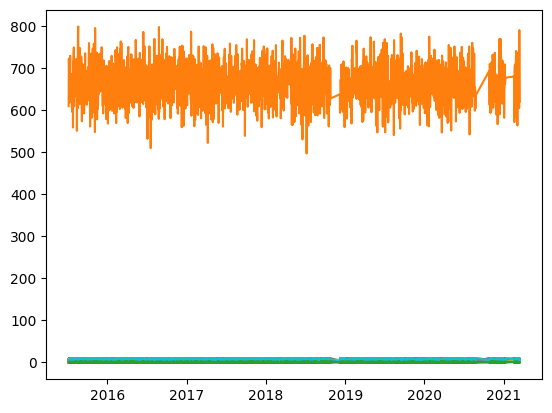

In [ ]:
plt.plot(X,Y)
plt.show()

# **CHECKING IF TIME SERIES IS STATIONARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [ ]:
data0=data['FRUITS_VEGGIES']
data1=data['DAILY_STRESS']
data2=data['PLACES_VISITED']
data3=data['CORE_CIRCLE']
data4=data['SUPPORTING_OTHERS']
data5=data['SOCIAL_NETWORK']
data6=data['ACHIEVEMENT']
data7=data['DONATION']
data8=data['BMI_RANGE']
data9=data['TODO_COMPLETED']
data10=data['FLOW']
data11=data['DAILY_STEPS']
data12=data['LIVE_VISION']
data13=data['SLEEP_HOURS']
data14=data['LOST_VACATION']
data15=data['DAILY_SHOUTING']
data16=data['SUFFICIENT_INCOME']
data17=data['PERSONAL_AWARDS']
data18=data['TIME_FOR_PASSION']
data19=data['WEEKLY_MEDITATION']
data20=data['GENDER']
data21=data['WORK_LIFE_BALANCE_SCORE']
data22=data['AGE_encoded']



# *PLOTTING GRAPHS AND TESTING *

**Augmented Dickey-Fuller test(ADF)**

p_value < 0.05:
The null hypothesis is rejected. The data is stationary
ELSE
The null hypothesis is not rejected. The data is non-stationary

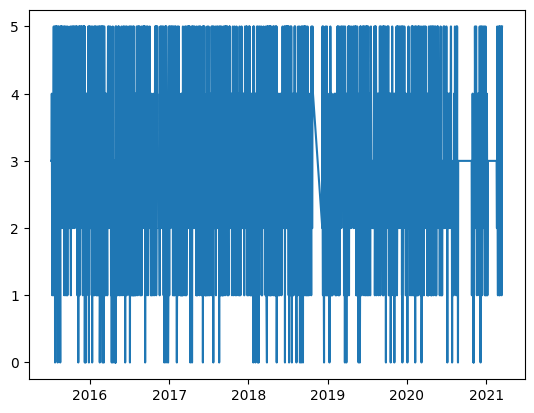

Test Statistic: -15.572791
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data0)
plt.show()
result=adfuller (data0,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

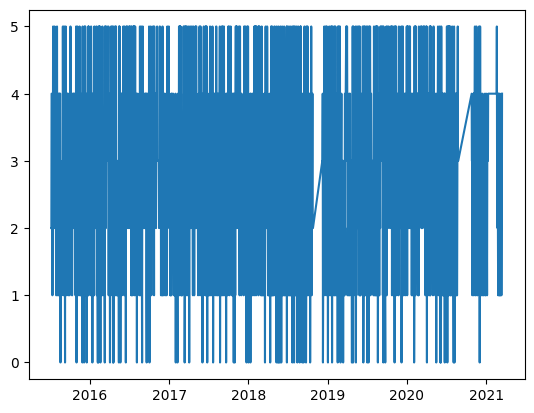

Test Statistic: -15.572791
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data1)
plt.show()
result=adfuller (data0,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

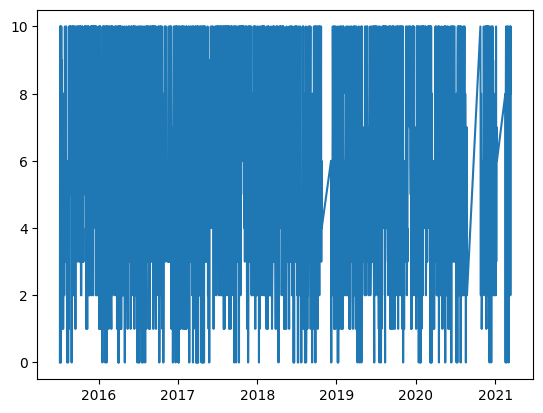

Test Statistic: -43.834253
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data4)
plt.show()
result=adfuller (data4,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))


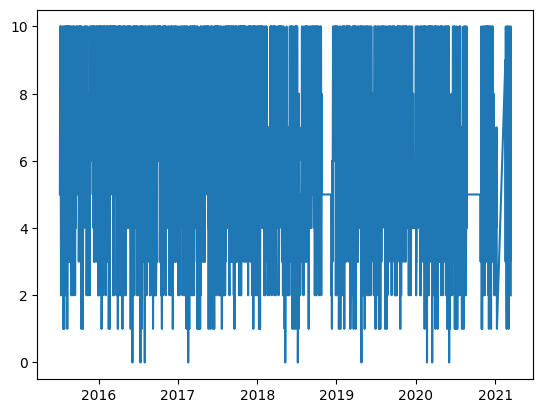

Test Statistic: -19.788033
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data5)
plt.show()
result=adfuller (data5,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

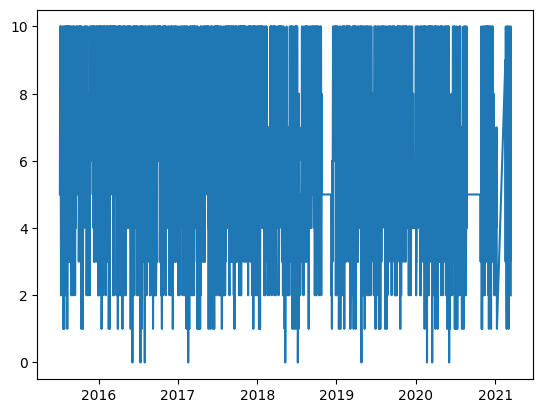

Test Statistic: -19.788033
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data5)
plt.show()
result=adfuller (data5,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

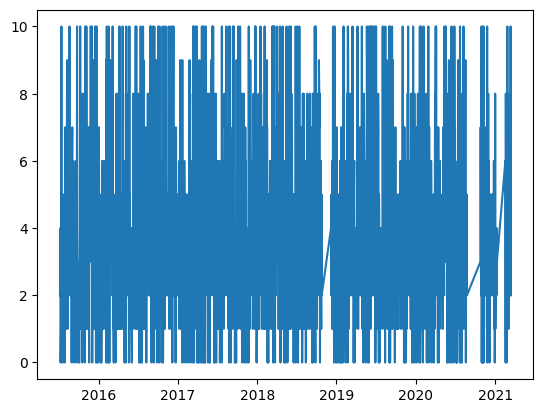

Test Statistic: -44.225582
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data6)
plt.show()
result=adfuller (data6,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

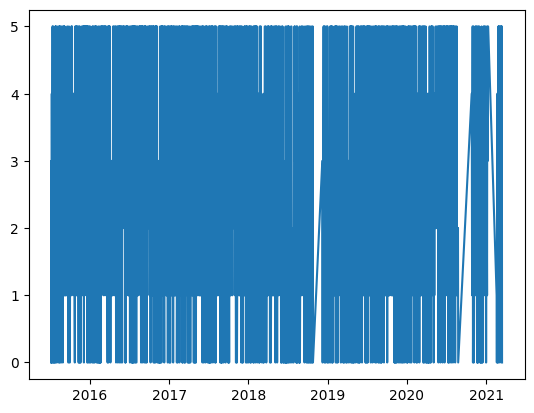

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data7)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

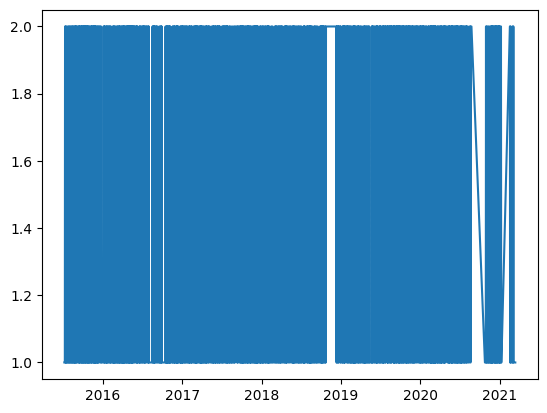

Test Statistic: -42.013090
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data8)
plt.show()
result=adfuller (data8,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

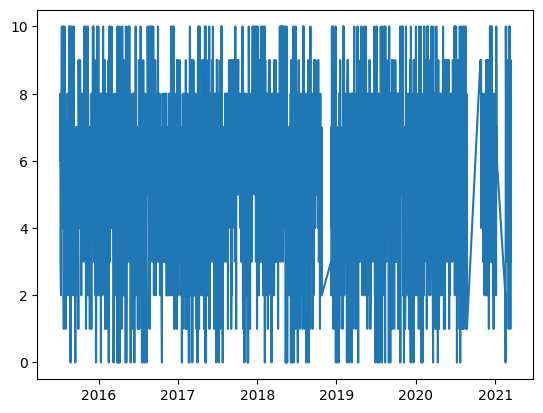

Test Statistic: -44.569029
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data9)
plt.show()
result=adfuller (data9,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

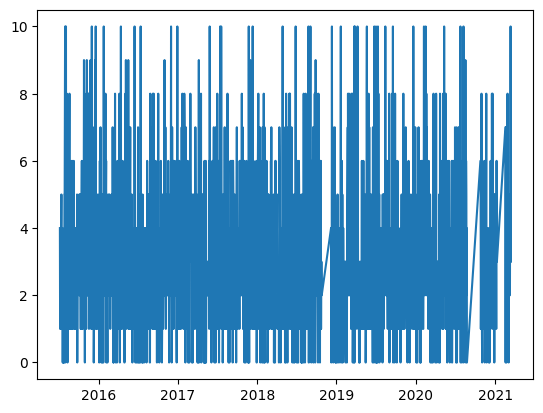

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data10)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

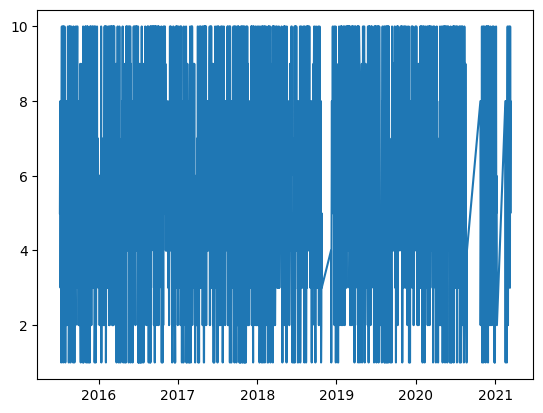

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data11)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

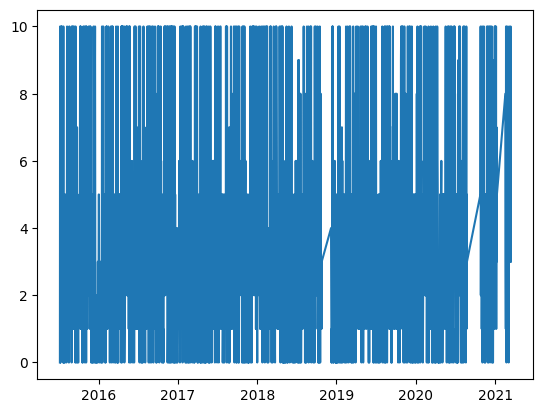

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data12)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

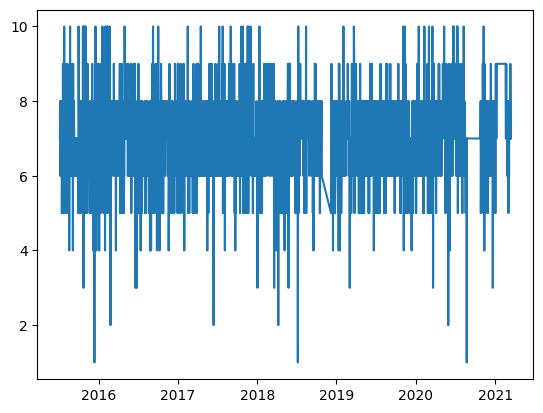

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data13)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

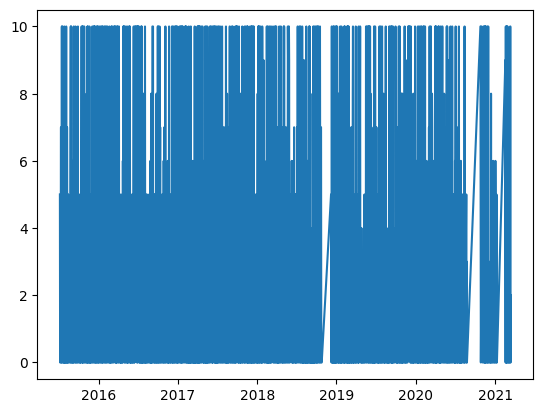

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data14)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

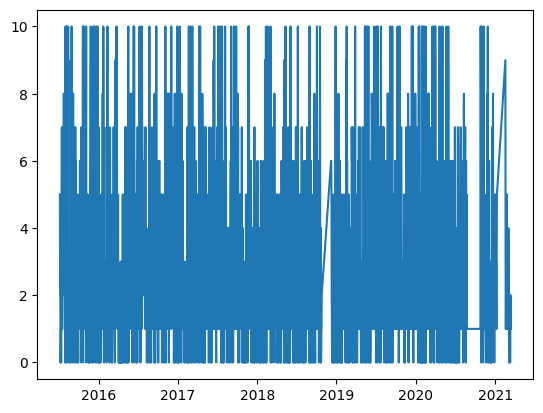

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data15)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

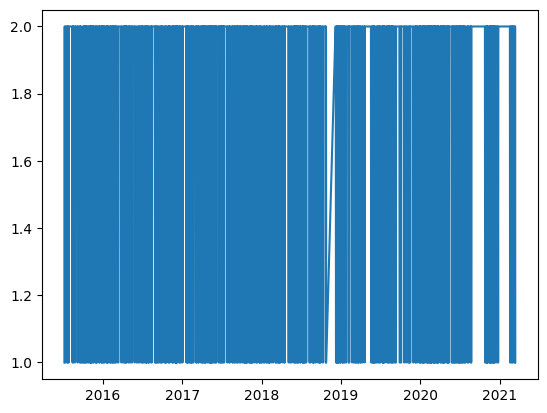

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data16)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

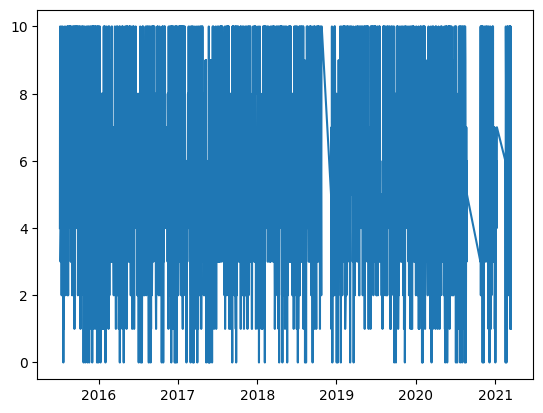

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data17)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

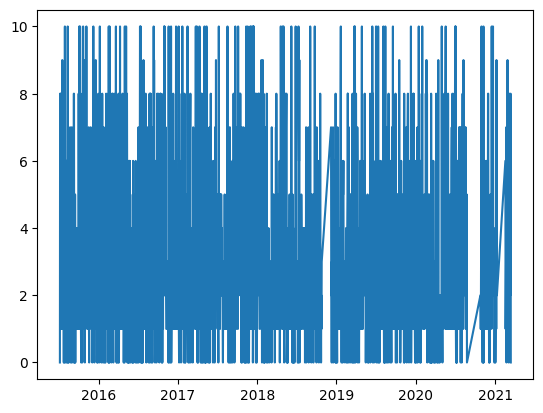

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data18)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

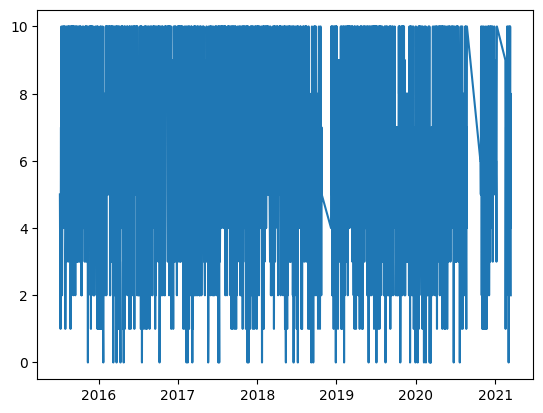

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data19)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

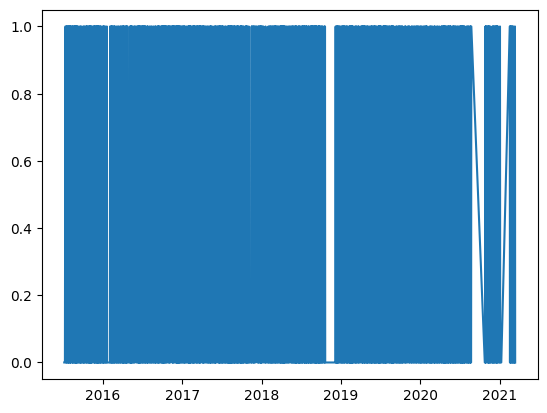

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data20)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

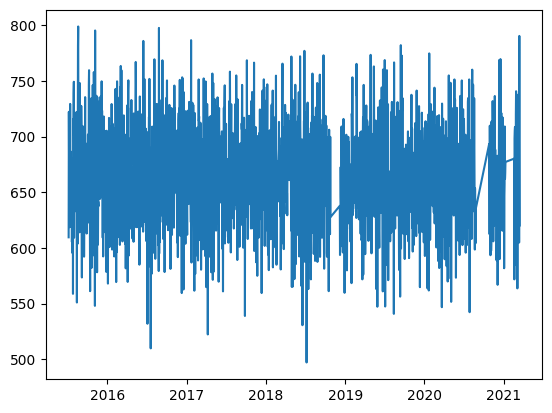

Test Statistic: -44.952565
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data21)
plt.show()
result=adfuller (data21,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

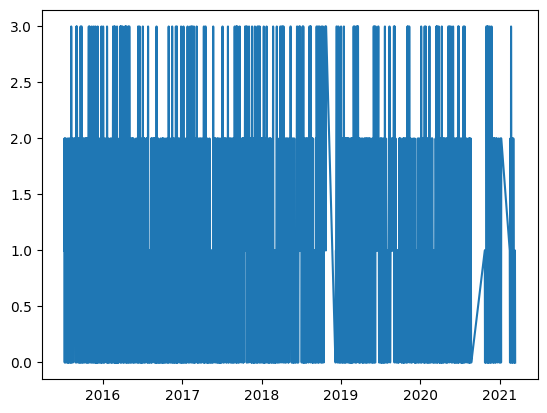

Test Statistic: -44.256429
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
plt.plot(X,data22)
plt.show()
result=adfuller (data7,autolag='AIC')
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

*Here the p-value is less than the significance level (usually 0.05) and also the ADF statistic is less than any of the critical values., we reject the null hypothesis that the time series has a unit root and conclude that the time series is stationary.*

**Kwiatkowski-Phillips-Schmidt-Shin (KPPS)**


In [ ]:
from statsmodels.tsa.stattools import kpss

 p_value < 0.05 - you can reject the null hypothesis  and derive that the series is NOT stationary.ELSE with p_value > 0.05 - the series is Stationary.

In [ ]:
result = kpss(data0, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.2107419349617043
p-value: 0.1
Lags Used: 3
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-43-a3b8fe010364>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data0, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data1, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])


KPSS Statistic: 0.09693102643732895
p-value: 0.1
Lags Used: 3
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-44-4fab4930cda5>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data1, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data2, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.6267369329705548
p-value: 0.0202057333663132
Lags Used: 7
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
#since p-value  < 0.05 , it is  nonstationary ;transforming a non-stationary time series into a stationary one using differencing:


# Calculate the first difference
data2 = data2.diff().dropna()
result = kpss(data2, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.19152823695555574
p-value: 0.1
Lags Used: 466
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-46-8e21f4bc4c94>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data2, regression='c')  # 'c' indicates the test with a constant term


Now since p-value is greater than 0.05 , we can conclude it is stationary

In [ ]:
result = kpss(data3, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.052949450041424144
p-value: 0.1
Lags Used: 1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-47-ae20106be34c>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data3, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data4 ,regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.1690735396280022
p-value: 0.1
Lags Used: 1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-48-de5f45218f88>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data4 ,regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data5, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.8244733014074573
p-value: 0.01
Lags Used: 12
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-49-e8b15aa390e3>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data5, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
# since p-value < 0.05 , it is non-stationary; transforming a non-stationary time series into a stationary one using differencing:


# Calculate the first difference
data5 = data5.diff().dropna()
result = kpss(data5, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.03949474700119858
p-value: 0.1
Lags Used: 81
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-50-7954e2af6246>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data5, regression='c')  # 'c' indicates the test with a constant term


Now since p-value is greater than 0.05 , we can conclude it is stationary

In [ ]:
result = kpss(data6, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.08324858789667809
p-value: 0.1
Lags Used: 1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-51-6e8a8f347d52>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data6, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data7, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.08287982061892911
p-value: 0.1
Lags Used: 4
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-52-64ffb1720360>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data7, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data8, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.5973932885782568
p-value: 0.022873337401976654
Lags Used: 7
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:

#since p-value < 0.05 , it is non-stationary;transforming a non-stationary time series into a stationary one using differencing:


# Calculate the first difference
data8 = data8.diff().dropna()
result = kpss(data8, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.04544257112750278
p-value: 0.1
Lags Used: 104
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-54-136ce7954c5d>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data8, regression='c')  # 'c' indicates the test with a constant term


Now since p-value is greater than 0.05 , we can conclude it is stationary

In [ ]:
result = kpss(data9, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.29943746733442994
p-value: 0.1
Lags Used: 6
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-55-690c2cbc228c>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data9, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data10, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.07371691617337482
p-value: 0.1
Lags Used: 6
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-56-e8e817c2e19c>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data10, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data11, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.8127093172595444
p-value: 0.01
Lags Used: 2
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-57-a8027729d17d>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data11, regression='c')  # 'c' indicates the test with a constant term


In [ ]:

#since p-value < 0.05 , it is non-stationary;transforming a non-stationary time series into a stationary one using differencing:


# Calculate the first difference
data11 = data11.diff().dropna()

In [ ]:
result = kpss(data11, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.08135226790612145
p-value: 0.1
Lags Used: 301
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-59-a8027729d17d>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data11, regression='c')  # 'c' indicates the test with a constant term


Now since p-value is greater than 0.05 , we can conclude it is stationary.

In [ ]:
result = kpss(data12, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.1022867626839814
p-value: 0.1
Lags Used: 9
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-60-6da70b8914fc>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data12, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data13, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.1061743738840776
p-value: 0.1
Lags Used: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-61-78f9eff210c6>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data13, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data14, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.09530221897982448
p-value: 0.1
Lags Used: 6
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-62-f9966f18581c>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data14, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data15, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.2421300364277639
p-value: 0.1
Lags Used: 0
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-63-42d817d9062c>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data15, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data16, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.08568428544183515
p-value: 0.1
Lags Used: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-64-40054b2cee15>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data16, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data17, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.13690201226433732
p-value: 0.1
Lags Used: 2
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-65-a4f7fb6e02ec>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data17, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data18, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.15846474019720394
p-value: 0.1
Lags Used: 2
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-66-69a03ee61f90>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data18, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data19, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.39234540642843824
p-value: 0.0804545661946387
Lags Used: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
result = kpss(data20, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])

KPSS Statistic: 0.7101007746171759
p-value: 0.01262720230752946
Lags Used: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
#since p-value < 0.05 , it is non-stationary;transforming a non-stationary time series into a stationary one using differencing:
lag = 1
max_iterations = 5

# Iterate to achieve stationarity
for i in range(max_iterations):
    # Apply differencing
    data20 = data20.diff(lag).dropna()

    # Perform KPSS test

    result = kpss(data21, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])


<ipython-input-69-0a0778a5d6a2>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data21, regression='c')  # 'c' indicates the test with a constant term
<ipython-input-69-0a0778a5d6a2>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data21, regression='c')  # 'c' indicates the test with a constant term
<ipython-input-69-0a0778a5d6a2>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data21, regression='c')  # 'c' indicates the test with a constant term
<ipython-input-69-0a0778a5d6a2>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the


KPSS Statistic: 0.11995848525715014
p-value: 0.1


<ipython-input-69-0a0778a5d6a2>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data21, regression='c')  # 'c' indicates the test with a constant term


Now since p-value is greater than 0.05 , we can conclude it is stationary

In [ ]:
result = kpss(data21, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])


KPSS Statistic: 0.11995848525715014
p-value: 0.1
Lags Used: 2
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-70-a994bc93b7d0>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data21, regression='c')  # 'c' indicates the test with a constant term


In [ ]:
result = kpss(data22, regression='c')  # 'c' indicates the test with a constant term

# Print the results
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Critical Values:", result[3])


KPSS Statistic: 0.4626046435893863
p-value: 0.05017041224595419
Lags Used: 5
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


# OTHER TESTS

**ROLLING STATISTICS TEST** :-

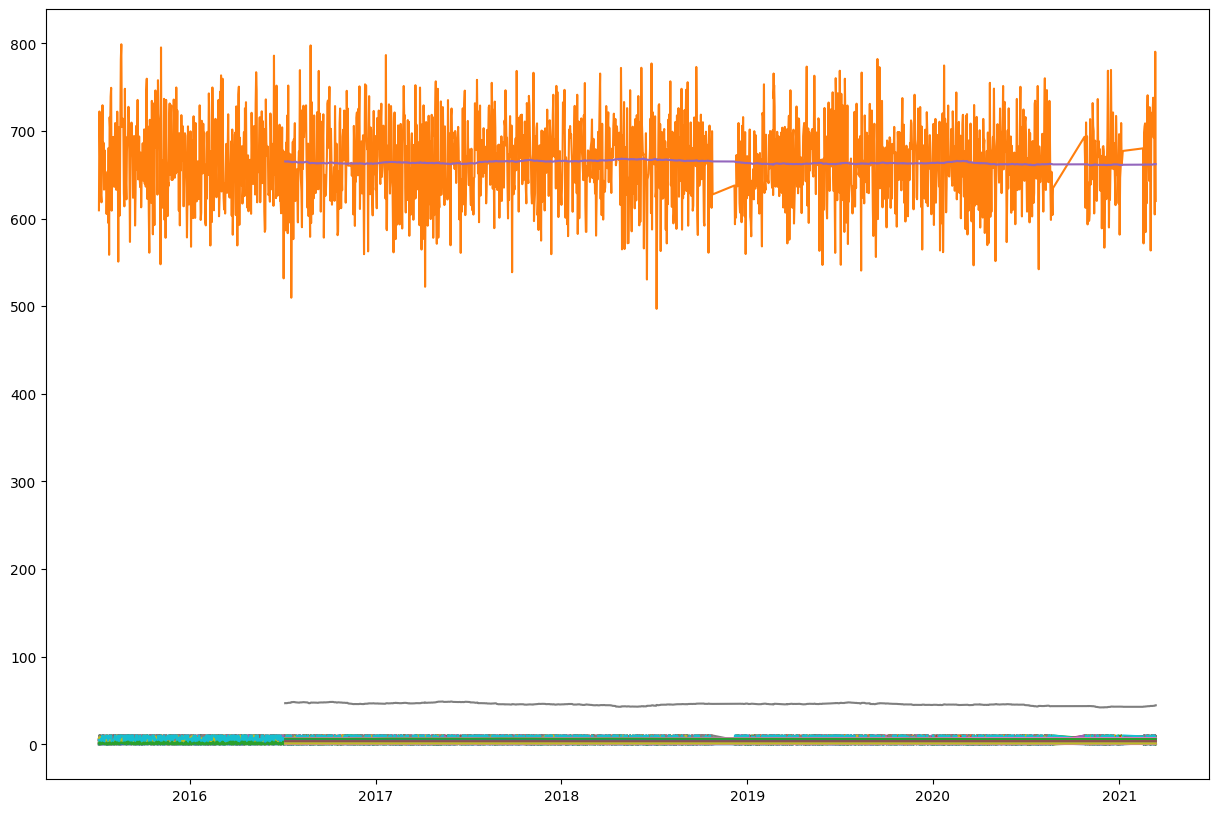

In [ ]:
indexed = data.set_index(['DATE'])
rolmean = indexed.rolling(window=365).mean()
rolstd = indexed.rolling(window =365).std()
plt.figure(figsize=(15,10))
plt.plot(indexed)
plt.plot(rolmean)
plt.plot(rolstd)
plt.show()

**AUTO CORRELATION TEST** :-

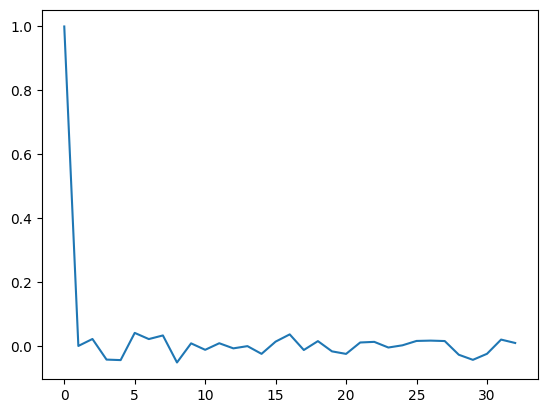

In [ ]:
from statsmodels.tsa.stattools import acf
auto = acf(data0)
plt.plot(auto)

AUTO CORRELATION OF TIME SERIES SHOULD DECAY TO ZERO AS LAG INCREASES ,hence we conclude that time series is STATIONARY

# ARIMA


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00


In [ ]:
#Figure Out Order for ARIMA Model
from pmdarima import auto_arima
sleep_fit =  auto_arima(data['SLEEP_HOURS'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6253.381, Time=1.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6248.172, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6247.488, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6247.449, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12841.815, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6249.492, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=6249.370, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6251.365, Time=0.63 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11028.926, Time=0.37 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 4.494 seconds


In [ ]:
#split data into training and testing
print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1899, 24)
(1869, 24) (30, 24)
FRUITS_VEGGIES                      1
DAILY_STRESS                        3
PLACES_VISITED                      8
CORE_CIRCLE                         7
SUPPORTING_OTHERS                  10
SOCIAL_NETWORK                      5
ACHIEVEMENT                         3
DONATION                            5
BMI_RANGE                           1
TODO_COMPLETED                      2
FLOW                                4
DAILY_STEPS                        10
LIVE_VISION                        10
SLEEP_HOURS                         7
LOST_VACATION                       0
DAILY_SHOUTING                      3
SUFFICIENT_INCOME                   2
PERSONAL_AWARDS                     4
TIME_FOR_PASSION                    6
WEEKLY_MEDITATION                   6
GENDER                              0
WORK_LIFE_BALANCE_SCORE         709.1
AGE_encoded                         1
DATE                       2021-01-05
Name: 1869, dtype: object FRUITS_VEGGIES                 

In [ ]:
#train the model
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(train['SLEEP_HOURS'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SLEEP_HOURS   No. Observations:                 1869
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3073.139
Date:                Fri, 01 Sep 2023   AIC                           6162.277
Time:                        08:21:49   BIC                           6206.542
Sample:                             0   HQIC                          6178.586
                               - 1869                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9946      0.028    253.714      0.000       6.941       7.049
ar.L1         -0.7941      0.295     -2.693      0.007      -1.372      -0.216
ma.L1          0.7529      0.297      2.539      0.011       0.172       1.334
ma.L2         -0.0410      0.030     -1.362      0.173      -0.100       0.018
ma.L3         -0.0045      0.028     -0.163      0.870      -0.058       0.049
ma.L4         -0.0307      0.029     -1.063      0.288      -0.087       0.026
ma.L5         -0.0078      0.032     -0.243      0.808      -0.071       0.055
sigma2         1.5693      0.042     37.345      0.000       1.487       1.652
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               148.74
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.35
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
data.index = pd.to_datetime(data.index)

<Axes: >

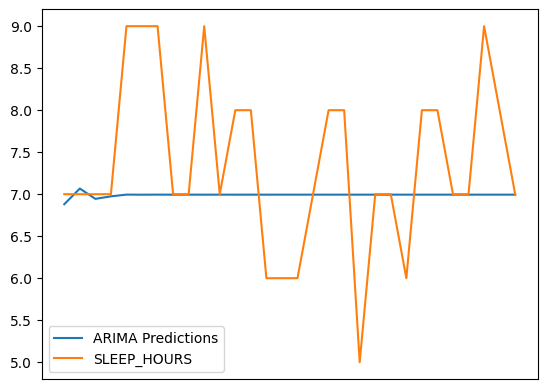

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
# pred = pred.append(test['SLEEP_HOURS'])
pred = pred.to_frame().iloc[:, 0]
plt.xticks(data.index, data.index.strftime('%Y-%m-%d'),visible= True)
pred.plot(legend=True)
test['SLEEP_HOURS'].plot(legend=True)

In [ ]:
pred = pred.head(30)

In [ ]:
print(test['SLEEP_HOURS'].mean())

7.366666666666666


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['SLEEP_HOURS'].mean()
rmse = sqrt(mean_squared_error(pred,test['SLEEP_HOURS']))
print(rmse)

1.0823016013118492


In [ ]:
model2=ARIMA(data['SLEEP_HOURS'],order=(1,0,5))
model2=model2.fit()
data.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_encoded
DATE,,,,,,,,,,,,,,,,,,,,,
2021-03-10,2021-03-10 02:39:00,5,3,2,6,10,6,3,5,1,...,7,0,2,2,5,2,7,Female,692.4,1
2021-03-11,2021-03-11 00:28:00,4,1,8,8,10,3,4,5,1,...,7,10,0,2,10,4,10,Female,731.2,0
2021-03-12,2021-03-12 01:32:00,1,2,1,6,2,5,2,2,1,...,9,10,2,1,1,2,4,Female,604.8,0
2021-03-13,2021-03-13 00:57:00,5,2,10,8,10,10,10,5,1,...,8,0,2,2,10,8,8,Male,790.5,1
2021-03-14,2021-03-14 01:42:00,5,4,2,4,8,2,2,0,1,...,7,2,1,1,1,0,2,Female,620.1,0


In [ ]:
# for future dates
index_future_dates=pd.date_range(start='2021-03-14',end='2021-04-13')
#print(index_future_dates)
pred=model2.predict(start=len(data),end=len(data)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)


2021-03-14    6.992526
2021-03-15    6.945969
2021-03-16    6.998667
2021-03-17    6.993095
2021-03-18    7.005983
2021-03-19    6.996138
2021-03-20    7.003905
2021-03-21    6.997777
2021-03-22    7.002612
2021-03-23    6.998798
2021-03-24    7.001807
2021-03-25    6.999433
2021-03-26    7.001306
2021-03-27    6.999828
2021-03-28    7.000994
2021-03-29    7.000074
2021-03-30    7.000800
2021-03-31    7.000227
2021-04-01    7.000679
2021-04-02    7.000323
2021-04-03    7.000604
2021-04-04    7.000382
2021-04-05    7.000557
2021-04-06    7.000419
2021-04-07    7.000528
2021-04-08    7.000442
2021-04-09    7.000510
2021-04-10    7.000456
2021-04-11    7.000498
2021-04-12    7.000465
2021-04-13    7.000491
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

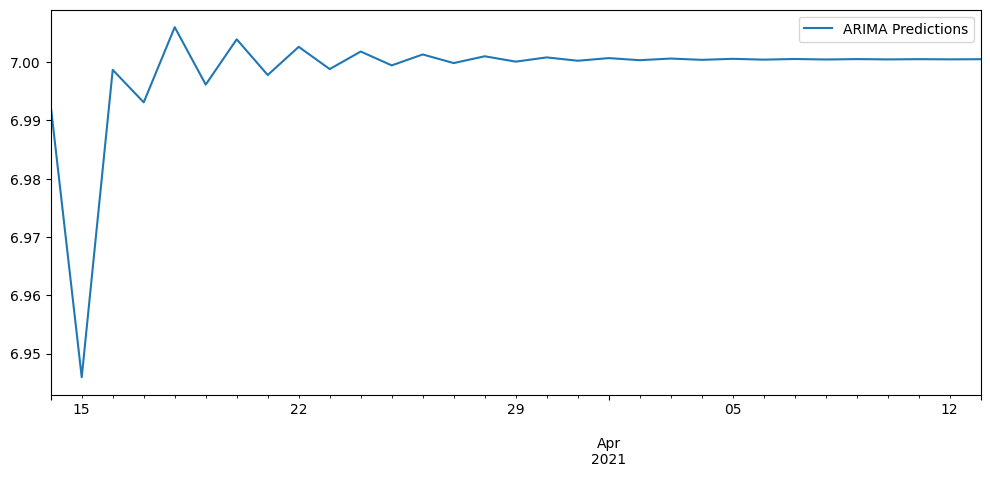

In [ ]:
pred.plot(figsize=(12,5),legend=True)

# USING ML

In [ ]:
new_data = pd.DataFrame({
    'DATE': data.index,
    'DAILY_SHOUTING': data['DAILY_SHOUTING'],
})

#Select the desired columns
#data = data[["DATE", "DAILY_SHOUTING"]]
#Print the extracted columns

print(new_data)

                 DATE  DAILY_SHOUTING
DATE                                 
2015-07-07 2015-07-07               5
2015-07-08 2015-07-08               2
2015-07-09 2015-07-09               2
2015-07-10 2015-07-10               0
2015-07-12 2015-07-12               1
...               ...             ...
2021-03-10 2021-03-10               2
2021-03-11 2021-03-11               0
2021-03-12 2021-03-12               2
2021-03-13 2021-03-13               2
2021-03-14 2021-03-14               1

[1899 rows x 2 columns]


In [ ]:
# Convert the date column to a datetime format
new_data['DATE'] = pd.to_datetime(new_data['DATE'])

# Set the date column as the index
new_data.set_index('DATE', inplace=True)

# Print the DataFrame with date as the index
print(new_data)

            DAILY_SHOUTING
DATE                      
2015-07-07               5
2015-07-08               2
2015-07-09               2
2015-07-10               0
2015-07-12               1
...                    ...
2021-03-10               2
2021-03-11               0
2021-03-12               2
2021-03-13               2
2021-03-14               1

[1899 rows x 1 columns]


In [ ]:
new_data.head()

<Axes: xlabel='DATE'>

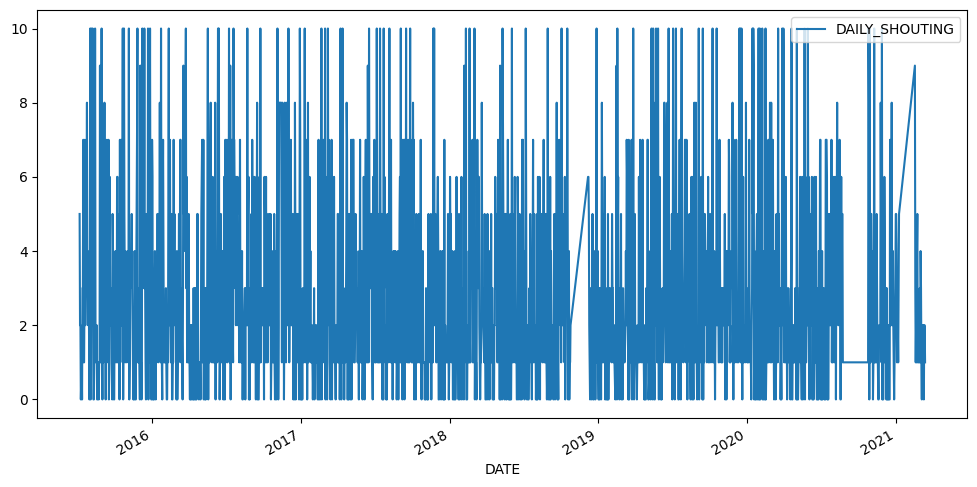

In [ ]:
new_data.plot(figsize=(12,6))

In [ ]:
#from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#data['DAILY_SHOUTING'] = pd.to_datetime(data['DAILY_SHOUTING'])
#data['DAILY_SHOUTING'] = data['DAILY_SHOUTING'].asfreq('D')

#results = seasonal_decompose(data['DAILY_SHOUTING'], period = 1)
#results.plot();

In [ ]:

new_data['yesterday']=new_data['DAILY_SHOUTING'].shift(+1)
new_data['dayafteryesterday']=new_data['DAILY_SHOUTING'].shift(+2)
new_data['3daysback']=new_data['DAILY_SHOUTING'].shift(+3)
new_data


,DAILY_SHOUTING,yesterday,dayafteryesterday,3daysback
DATE,,,,
2015-07-07,5,NaN,NaN,NaN
2015-07-08,2,5.0,NaN,NaN
2015-07-09,2,2.0,5.0,NaN
2015-07-10,0,2.0,2.0,5.0
2015-07-12,1,0.0,2.0,2.0
...,...,...,...,...
2021-03-10,2,1.0,2.0,0.0
2021-03-11,0,2.0,1.0,2.0
2021-03-12,2,0.0,2.0,1.0


In [ ]:

new_data=new_data.dropna()
new_data

,DAILY_SHOUTING,yesterday,dayafteryesterday,3daysback
DATE,,,,
2015-07-10,0,2.0,2.0,5.0
2015-07-12,1,0.0,2.0,2.0
2015-07-13,0,1.0,0.0,2.0
2015-07-14,3,0.0,1.0,0.0
2015-07-15,3,3.0,0.0,1.0
...,...,...,...,...
2021-03-10,2,1.0,2.0,0.0
2021-03-11,0,2.0,1.0,2.0
2021-03-12,2,0.0,2.0,1.0


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [ ]:
import numpy as np
x1,x2,x3,y=new_data['yesterday'],new_data['dayafteryesterday'],new_data['3daysback'],new_data['DAILY_SHOUTING']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)


[[2. 2. 5.]
 [0. 2. 2.]
 [1. 0. 2.]
 ...
 [0. 2. 1.]
 [2. 0. 2.]
 [2. 2. 0.]]


In [ ]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [ ]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

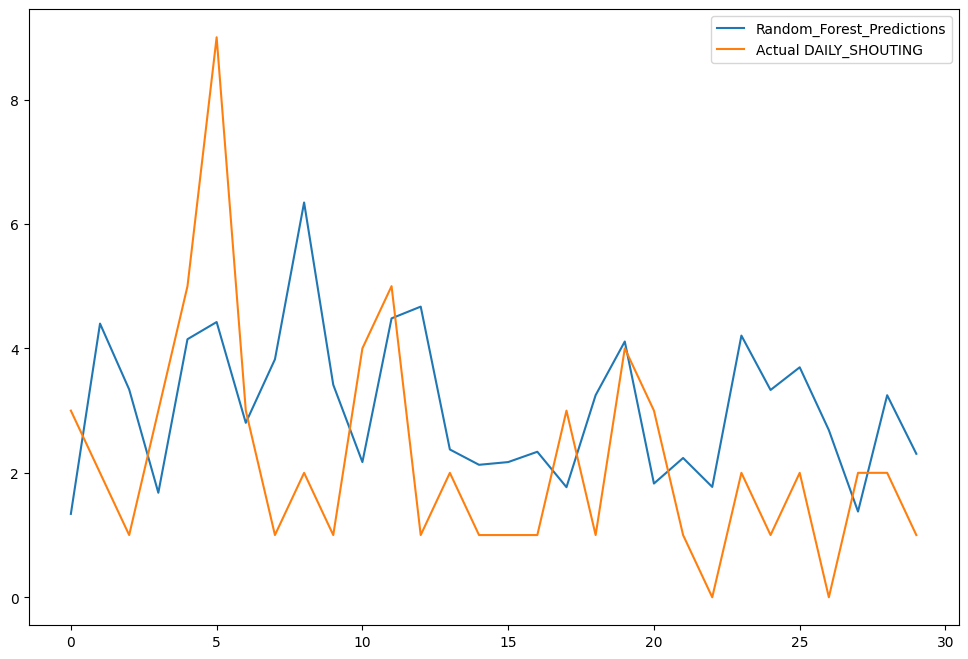

In [ ]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual DAILY_SHOUTING')
plt.legend(loc="upper right")
plt.show()

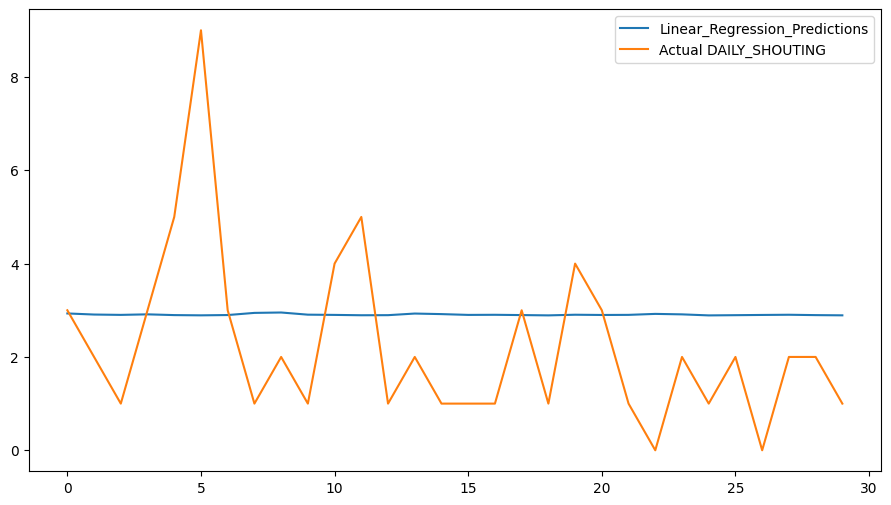

In [ ]:

lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual DAILY_SHOUTING')
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))


In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 2.0693622015935866
Mean Squared Error for Linear Regression Model is: 1.9261671283534705


# SOMTHINHG NEW